# 9기 3주차 과제 정답

In [8]:
!pip3 install numpy 
!pip3 install pandas
!pip3 install matplotlib
!pip3 install seaborn 
!pip3 install scikit-learn
!pip3 install scipy

## 1. y=10+9X+e에 해당하는 자료(산점도) 구성하기.

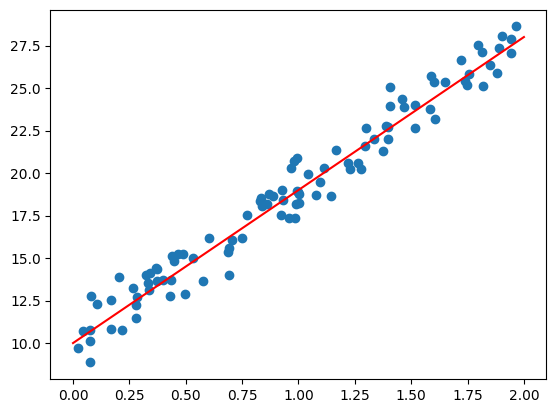

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 난수생성 시드 9
np.random.seed(9)

# 직선식 작성 y=10+9X+e
X=2*np.random.rand(100,1)
e=np.random.randn(100,1)
y=10+9*X+e

# 산점도 그리기
plt.scatter(X,y)

# 과제1 정답
x_line = np.linspace(0, 2, 100)
y_line = 10+9*(x_line)

plt.plot(x_line, y_line, color='red');

## scikit-learn LinearRegression을 이용해 캘리포니아 중간주택가격(='MedHouseVal') 예측
##### **보스턴데이터는 주택가격 데이터셋이 1.2버전부터 제거되어 캘리포니아로 대체

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import fetch_openml
%matplotlib inline

# california 데이타셋 로드
housing = fetch_openml(name="house_prices", as_frame=True)

# california 데이타셋 DataFrame 변환
california = fetch_california_housing(as_frame=True)
californiaDF = california['frame']
californiaDF.head()

C:\Users\gdeok\AppData\Local\Temp\ipykernel_22856\2747322661.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


* MedInc: 중간 소득  
* HouseAge: 주택 연식  
* AveRooms: 평균 방 수  
* AveBedrms: 평균 침실 수  
* Population: 인구  
* AveOccup: 평균 자가 비율  
* Latitude: 위도  
* Longitude: 경도  
* MedHouseVal: 주택 가격의 중앙값  

### 산점도를 통해 회귀직선 표현

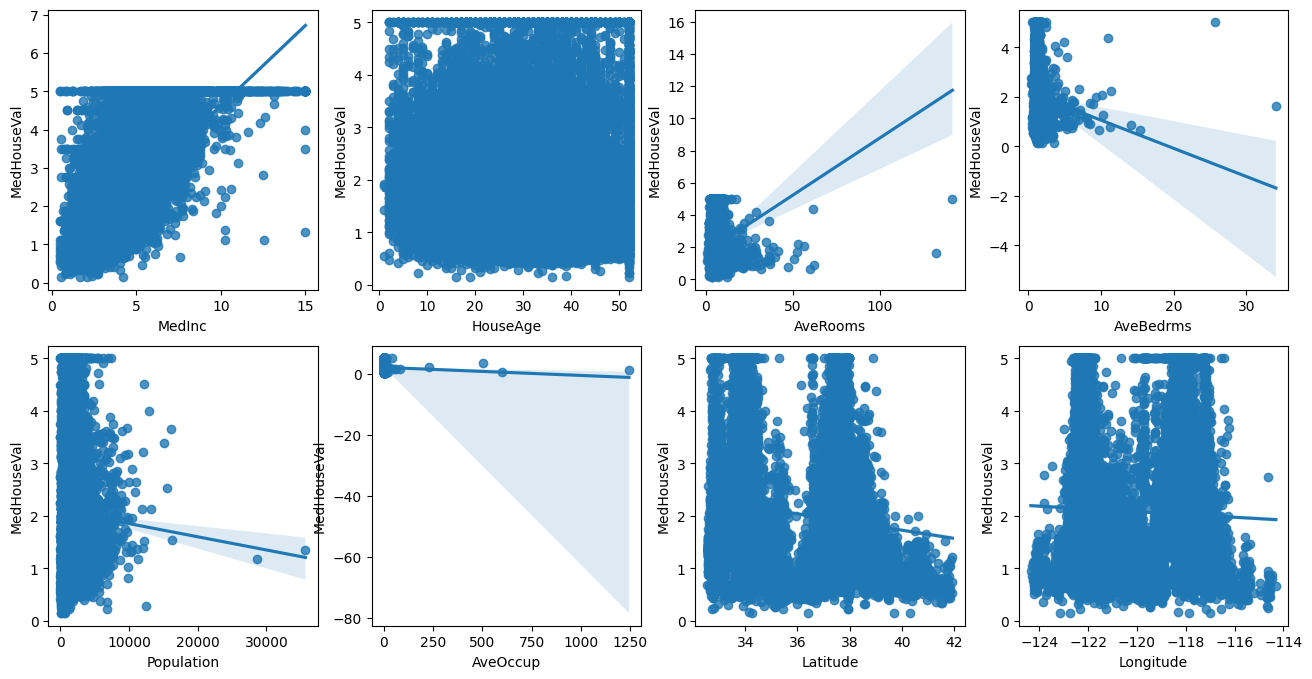

In [3]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ['MedInc','HouseAge','AveRooms', 'AveBedrms','Population', 'AveOccup',
               'Latitude', 'Longitude']

for i, feature in enumerate(lm_features):
    row = int(i / 4)
    col = i % 4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='MedHouseVal', data=californiaDF, ax=axs[row][col])


### 2. y_target에는 'MedHouseVal', X_data에는 'MedHouseVal'를 제외한 나머지 피처를 이용하여 다중회귀 모델 만들기

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

# 과제 2 정답
# 데이터 준비
# y_target은 'MedHouseVal', X_data은 'MedHouseVal'이외 칼럼들로 설정 
y_target = californiaDF['MedHouseVal']
X_data = californiaDF.drop('MedHouseVal', axis=1)

# 데이터 분할 
# Test Size는 0.3으로 (난수는 자유)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=23)

# Linear Regression OLS로 학습/예측/평가 수행 
# 모델 생성
lr =  LinearRegression()

# 학습
lr.fit(X_train, y_train)

# 예측
y_preds = lr.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

# MSE값 출력
print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))


MSE : 0.543 , RMSE : 0.737
Variance score : 0.595


In [7]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: -37.23905305294162
회귀 계수값: [ 0.4  0.  -0.1  0.6 -0.  -0.  -0.4 -0.4]


In [8]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 컬럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)

AveBedrms     0.6
MedInc        0.4
HouseAge      0.0
Population   -0.0
AveOccup     -0.0
AveRooms     -0.1
Latitude     -0.4
Longitude    -0.4
dtype: float64

##### MedHouseVal = - 37.239 + AveBedrms\*0.6 + MedInc\*0.4 + AveRooms*-0.1 + Latitude*-0.4 + Longitude*-0.4 

## 3. 릿지회귀

In [7]:
# 앞의 LinearRegression예제에서 분할한 feature 데이터 셋인 
# X_data과 Target 데이터 셋인 Y_target 데이터셋을 그대로 이용 
from sklearn.linear_model import Ridge

# 과제3 정답
# 릿지회귀 모형 생성. alpha=10
ridge = Ridge(alpha=10)

# 학습
ridge.fit(X_train, y_train)

# 예측
y_pred = ridge.predict(X_test)

# 평가 
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('MSE: {0:.3f}'. format(mse))
print('RMSE:{0:.3f}'. format(rmse))

MSE: 0.543
RMSE:0.737


## 4. MAE가 아닌 RMSE를 사용하는 이유는 무엇인가요?

MAE는 실제 값과 예측값의 차이를 절댓값으로 변환해 평균낸 것입니다.   
MAE는 다른 지표들에 비해 직관적이라는 특징을 가지고 있는데, 이러한 장점을 가진 MAE가 아닌 RMSE를 사용하는 이유는 무엇인지 설명해주세요.

# MAE사용 시 1) 이상치가 있을 경우 이를 배제하기 어렵고, 2) 단위가 다를 경우, 모델 간 비교가 어렵다는 단점이 존재합니다. 이를 보완하기 위해 RMSE를 사용합니다.

## 5.편향-분산 트레이드 오프에 대해서 자세히 설명후 해결방안을 찾아주세요

### 5-1. 편향 분산의 차이점을 과대과소 적합을 활용하여 설명해주세요  

# 편향은 예측한 결과와 실제값과의 차이이고, 분산은 데이터들이 퍼져있는 정도를 의미합니다. 편향이 높아지면 분산은 낮아지는 경향이 있고, 편향이 낮아지면 분산은 높아지는 경향이 있습니다. 고편향, 저분산에서 과소적합되기 쉬우며, 저편향, 고분산에서 과적합되기 쉽습니다.

### 5-2. 트레이드 오프 문제점 해결 방안을 서술해주세요

# 트레이드 오프의 문제점이란 편향과 분산이 트레이드 오프 관계에 있어 저편향, 저분산의 동시 달성이 불가능하다는 것입니다. 이를 해결하기 위해 '규제' 방법을 사용합니다. 규제는 과대 적합을 피하여 일반화 성능을 잃지 않도록 가중치를 제한하는 방법으로, 라쏘 회귀와 릿지 회귀, 엘라스틱넷 회귀가 있습니다.